# Creation of Final Environment Data

Based on the preprocessor class, this script creates the data for the agent-environment interaction. Furthermore, the turbulence index will be calculated.

## Import Libraries

In [1]:
# Load the packages
from preprocessor import Preprocessor
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Create the data for the Agent Environment Interaction

In [2]:
# Set the paths where the market data and sentiment analysis data lie
MARKET_DATA_PATH = '/Applications/Studium/Master/Masterarbeit/AADRL/data/market_data.csv'
SA_DATA_PATH = '/Applications/Studium/Master/Masterarbeit/AADRL/data/stock_sentiments_final.csv'

In [3]:
# Read the financial data and the sentiments
financial_market_data = pd.read_csv(MARKET_DATA_PATH,header = [0,1],index_col=0)
sentiments = pd.read_csv(SA_DATA_PATH,index_col=0)

In [4]:
# Initialize the preprocessor
preprocessor = Preprocessor(financial_market_data, sentiments)

In [5]:
# Get the final data
df = preprocessor.get_preprocessed_data()

In [6]:
df

Adj Close                                                        \
                  MRK         MS         MU       NVDA         M       EBAY   
2009-06-16  14.095046  20.710459   5.107066   2.524874  6.998578   6.644090   
2009-06-17  14.291206  20.253498   5.205280   2.586792  6.986135   6.590103   
2009-06-18  14.798928  20.658859   5.165993   2.536340  6.612875   6.601671   
2009-06-19  14.948934  20.835751   5.234743   2.563860  7.085671   6.663369   
2009-06-22  14.527760  19.627028   4.930284   2.419385  7.073227   6.343312   
...               ...        ...        ...        ...       ...        ...   
2020-06-08  69.859848  44.060913  52.740288  87.795670  8.689130  45.685234   
2020-06-09  69.320518  44.280560  52.200108  90.198700  8.070429  46.651081   
2020-06-10  68.907585  42.778191  51.532269  93.396950  7.224262  46.182224   
2020-06-11  65.182861  39.158428  47.652859  87.708427  6.150632  44.953819   
2020-06-12  64.809135  40.660805  47.819820  89.066986  6.641953  44.691273   

                                                         ... sentiment       \
                  NFLX       GILD         VZ        DAL  ...        MS   MU   
2009-06-16    5.404286  16.246944  13.048951   5.421638  ...       0.0  0.0   
2009-06-17    5.771429  16.750980  13.154963   5.439241  ...       0.0  0.0   
2009-06-18    5.901429  17.107851  13.291905   5.263214  ...       0.0  0.0   
2009-06-19    5.941429  17.299177  13.101957   5.342426  ...       0.0  0.0   
2009-06-22    5.792857  17.041634  13.260982   4.972769  ...       0.0  0.0   
...                ...        ...        ...        ...  ...       ...  ...   
2020-06-08  419.489990  65.257004  46.476688  36.632431  ...       1.0  0.0   
2020-06-09  434.049988  65.782646  46.292664  33.857990  ...       0.0  0.0   
2020-06-10  434.480011  65.341774  46.444679  31.351095  ...      -1.0  0.0   
2020-06-11  425.559998  62.305210  45.164551  26.951637  ...      -1.0  0.0   
2020-06-12  418.070007  62.613144  45.228558  30.152143  ...       0.0  0.0   

                                                    
           NFLX  NOK NVDA ORCL  PEP QCOM   VZ  WFC  
2009-06-16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2009-06-17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2009-06-18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2009-06-19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2009-06-22  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  ...  ...  
2020-06-08  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  
2020-06-09  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  
2020-06-10  1.0  0.0  1.0  0.0  0.0  0.0  0.0 -1.0  
2020-06-11 -1.0 -1.0  0.0 -1.0 -1.0  0.0 -1.0 -1.0  
2020-06-12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2768 rows x 180 columns]

In [7]:
# Check that dataframe does not contain NaN values
print(df.isna().any(axis = 1).sum(),df.isna().any(axis = 0).sum())

0 0


In [8]:
# Save the market data 
df.to_csv('/Applications/Studium/Master/Masterarbeit/AADRL/data/agent_environment_data.csv',index=True)

## Calculate Turbulence Index

In [13]:
# Read the agent-environment data
df = pd.read_csv('/Applications/Studium/Master/Masterarbeit/AADRL/data/agent_environment_data.csv', 
                 header=[0,1],index_col=0)

In [14]:
# Get the close prices and define the starting date for the test dataset
close_prices = df['Adj Close']
start_test = '2016-01-04' # 2016-01-01 not available 

In [15]:
# Calculate the returns
returns = close_prices.pct_change()

In [16]:
# Split the upper dataframe into training and test dataset
training_returns = returns.loc[:returns.index[returns.index == start_test][0]].iloc[:-1]
test_returns = returns.loc[returns.index[returns.index == start_test][0]:]

In [17]:
# Calculate covariance and means over training dataset (similar to the paper 'Skulls, Financial Turbulence, and Risk Management')
cov_training = training_returns.cov()
means_training = training_returns.mean()

In [18]:
# Calculate the turbulence for each return
calc_turbulence = lambda r: (r-means_training).dot(np.linalg.inv(cov_training)).dot((r-means_training).T)  
turbulences_training = training_returns.apply(calc_turbulence,axis=1)

In [19]:
# Get the quantile
quantile_95 = turbulences_training.quantile(0.95)
quantile_90 = turbulences_training.quantile(0.90)
quantile_99 = turbulences_training.quantile(0.99)

print(quantile_95,quantile_90,quantile_99)

72.17774935546251 54.57399788727979 137.34719240516966


In [20]:
# Calculate the turbulences on the test dataset
turbulences_test = test_returns.apply(calc_turbulence,axis=1)

In [21]:
# Create one dataframe that contains all the turbulences
turbulences = pd.concat([turbulences_training,turbulences_test])

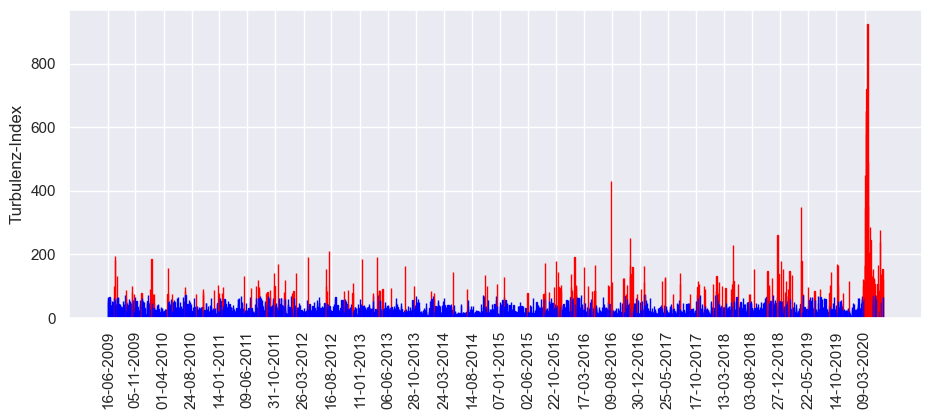

In [22]:
# Display for each date the turbulence
plt.figure(figsize=(11, 4))
sns.set_theme()
bars = plt.bar(x=pd.to_datetime(turbulences.index), height=turbulences.values)

# Change the color of the bars based on their height
for bar in bars:
    if bar.get_height() > quantile_95:
        bar.set_color('red')
    else:
        bar.set_color('blue')


xticks = pd.to_datetime(turbulences.index)
plt.xticks(ticks=xticks[::100],rotation=90)
plt.ylabel('Turbulenz-Index')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.show()

In [24]:
# Save the dataframe
turbulences = pd.DataFrame({'Turbulences':turbulences},index=turbulences.index)
turbulences.to_csv(r'/Applications/Studium/Master/Masterarbeit/AADRL/data/turbulence_index.csv')